# FHN equations

$$
\begin{align}
\partial_t u &= D_u \Delta u + [u(1-u)(u-a) -v  ]/\epsilon\\
\partial_t v &= D_v \Delta v + \epsilon (u - \gamma v)
\end{align}
$$

$$
(a, \epsilon, \gamma, D_u, D_v) 
= (0.25, 0.05, 3.0, 4.0 \times 10^{-5}, 1.0\times 10^{-7})
$$

## 準備 

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import numpy as np
import equations as eq
from scipy.integrate import odeint
from scipy.fftpack import rfft, irfft

import h5py

C:\Users\ryoikota\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

## ODE

In [4]:
def fhnode(uv,t, a, eps, gamma):
    inveps = 1.0/eps
    u,v = uv.reshape(2,1)
    ret = np.zeros(2)
    dudt, dvdt = ret.reshape(2,1)
    dudt[:] = inveps*(u*(1.0 - u)*(u - a) - v)
    dvdt[:] = eps*(u - gamma*v)
    
    return ret


In [5]:
trange = np.linspace(0., 50.0, 2001)
uv0 = np.zeros(2)
uv0[0] = 0.3

In [6]:
uv = odeint(fhnode, uv0, np.linspace(0., 10.0, 1001), 
            (0.25, 0.05, 3.0))
u,v = uv.T

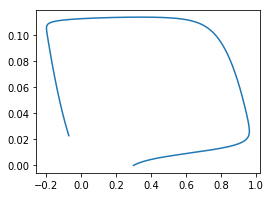

In [7]:
plt.figure(figsize=(4,3))
plt.plot(u, v)

## PDE 

In [8]:
NW = 100
fhn01 = eq.FHN(NW)
args = fhn01.getParamDefault()

In [9]:
fhn01.NC

2

In [10]:
args

[0.25, 0.05, 3.0, 4e-05, 1e-07]

In [11]:
fhn01.getParamNames()

('a', 'eps', 'gamma', 'Du', 'Dv')

In [12]:
N2 = fhn01.N2
J = fhn01.J
x = fhn01.get_x()

In [13]:
uv0 = np.zeros(2*N2)
u0,v0 = uv0.reshape((2,N2))
U0 = np.zeros(J) + 0.4*np.exp(-800.0*(x-0.4)**2)
V0 = np.zeros(J) + 5.0e-2*np.exp(-800.0*(x-0.35)**2)

In [36]:
u0[:] = rfft(U0)[:N2]
v0[:] = rfft(V0)[:N2]

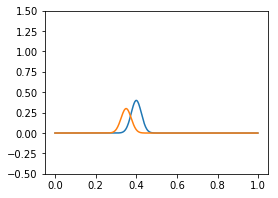

In [37]:
plt.figure(figsize=(4,3))
plt.ylim((-0.5, 1.5))
plt.plot(x, U0, x, 6.0*V0)

In [38]:
trange = np.linspace(0.0, 30.0, 3001)

dt = 1.0e-4

In [40]:
fh.close()

In [41]:
fh = h5py.File('fhn.hdf5', 'w')
fhn01.mkInitDataSet(uv0, fh, dt)

In [42]:
args

[0.25, 0.05, 3.0, 4e-05, 1e-07]

In [43]:
fhn01.evolve(fh,trange,tuple(args))

In [44]:
for k in fh.keys():
    print(k)
    

J
N
dt
t_hist
trange
u


In [45]:
hoge = fh['u'][()]

In [46]:
type(hoge)

numpy.ndarray

In [47]:
hoge.shape

(3001, 402)

In [48]:
up = fhn01.mkPhysData(fhn01.reshapeTS(hoge, 3001))

In [49]:
x = fhn01.get_x()

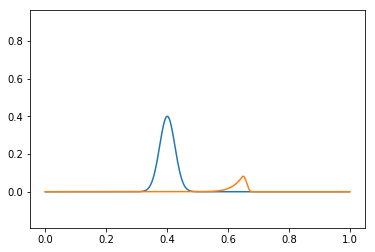

In [64]:
i = 3000

l = plt.plot(x, up[i,0,:], x, up[i,1,:])

l[0].set_ydata(up[0,0,:])


In [54]:
type(l)

list

In [55]:
len(l)

2

In [62]:
type(l[1])

matplotlib.lines.Line2D

In [ ]:
l[1].set_data